In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import cv2

input_dir = 'dataset/test'
output_dir = 'dataset/output'
groundtruth_dir = 'dataset/groundtruth'

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Name\AppData\Local\Temp\ipykernel_8996\2689890292.py:3: SyntaxWarning: invalid escape sequence '\g'
  groundtruth = 'dataset\groundtruth\SL_GT_002.png'


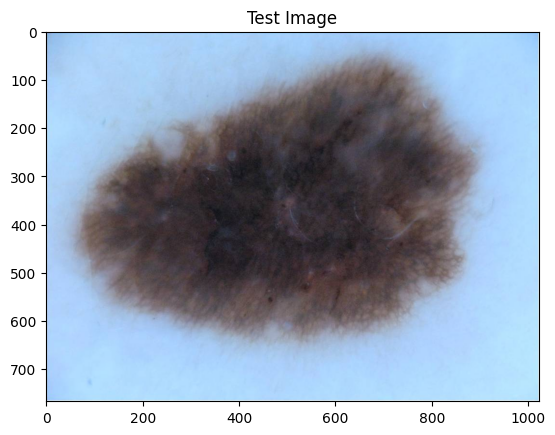

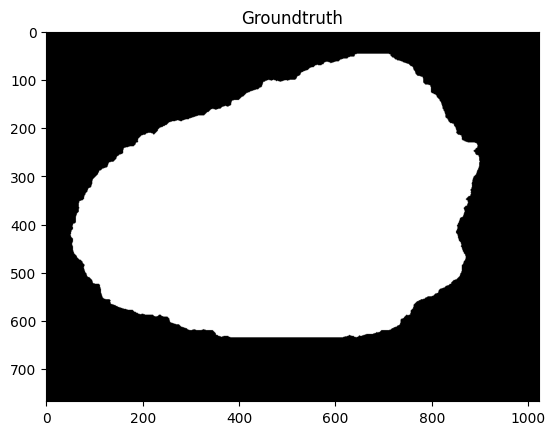

In [19]:
# Load and Display the Test Image
test_img = 'dataset/test/SL_002.jpg'
groundtruth = 'dataset\groundtruth\SL_GT_002.png'
img = cv2.imread(test_img)
gt_img = cv2.imread(groundtruth)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Test Image')
plt.show()

plt.imshow(cv2.cvtColor(gt_img, cv2.COLOR_BGR2RGB))
plt.title('Groundtruth')
plt.show()

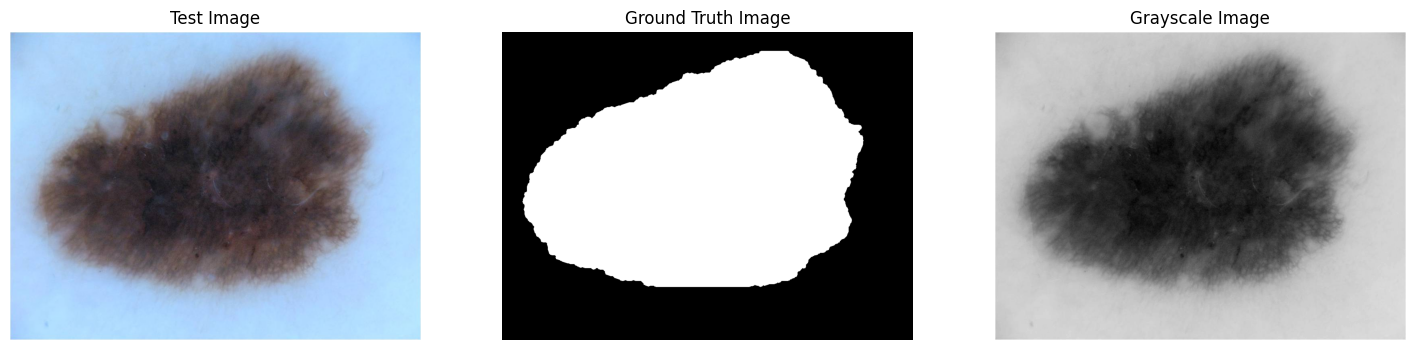

In [20]:
# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display Test Image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Test Image')
ax[0].axis('off')

# Display Ground Truth Image
ax[1].imshow(gt_img, cmap='gray')
ax[1].set_title('Ground Truth Image')
ax[1].axis('off')

# Display Grayscale Image
ax[2].imshow(gray, cmap='gray')
ax[2].set_title('Grayscale Image')
ax[2].axis('off')

plt.show()

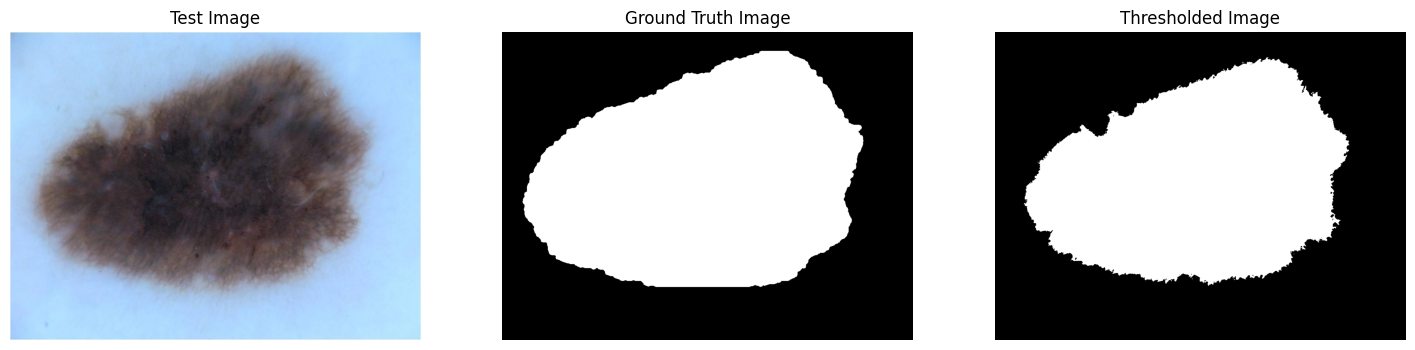

In [21]:
# Adaptive Thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display Test Image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Test Image')
ax[0].axis('off')

# Display Ground Truth Image
ax[1].imshow(gt_img, cmap='gray')
ax[1].set_title('Ground Truth Image')
ax[1].axis('off')

# Display Thresholded Image
ax[2].imshow(thresh, cmap='gray')
ax[2].set_title('Thresholded Image')
ax[2].axis('off')

plt.show()

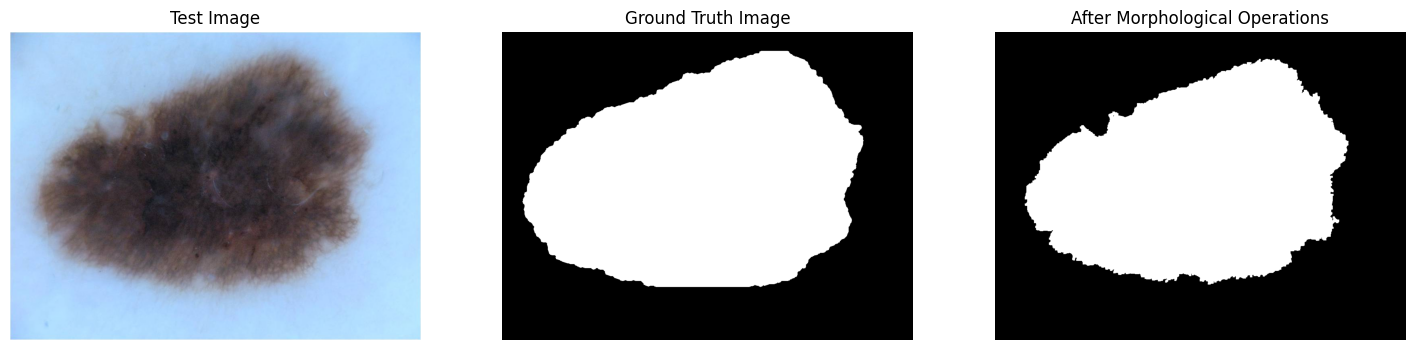

In [22]:
# Morphological Opening and Closing
kernel_open = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_open, iterations=2)

kernel_close = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_close, iterations=4)


fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display Test Image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Test Image')
ax[0].axis('off')

# Display Ground Truth Image
ax[1].imshow(gt_img, cmap='gray')
ax[1].set_title('Ground Truth Image')
ax[1].axis('off')

ax[2].imshow(opening, cmap='gray')
ax[2].set_title('After Morphological Operations')
ax[2].axis('off')

plt.show()

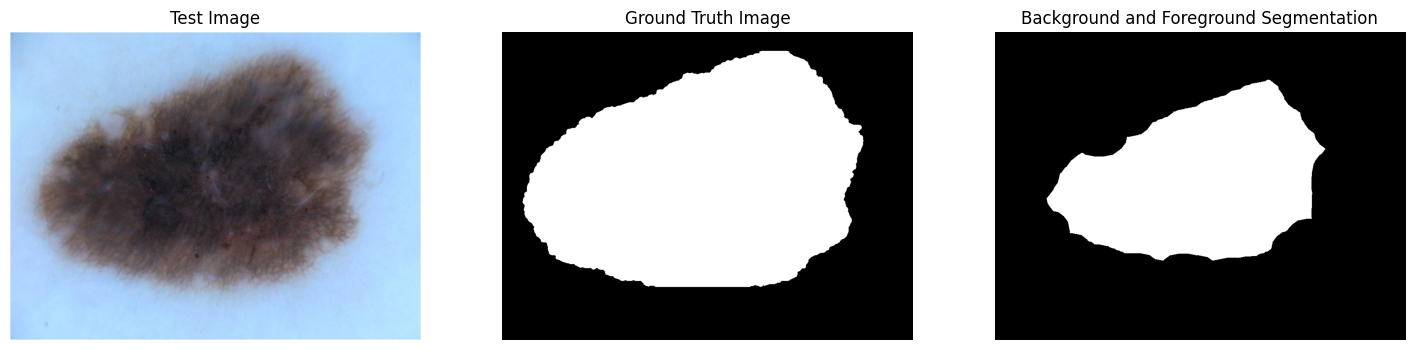

In [23]:
# Background, Foreground and Unknown Areas Segmentation

# Determine Background Area
sure_bg = cv2.dilate(closing, kernel_close, iterations=3)

# Find Sure Foreground Area
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 5)
threshold_value = dist_transform.mean() + 0.3 * dist_transform.std()
_, sure_fg = cv2.threshold(dist_transform, threshold_value, 255, 0)

# Finding Unknown Region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display Test Image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Test Image')
ax[0].axis('off')

# Display Ground Truth Image
ax[1].imshow(gt_img, cmap='gray')
ax[1].set_title('Ground Truth Image')
ax[1].axis('off')

# Display Image after Morphological Opening
ax[2].imshow(sure_fg, cmap='gray')
ax[2].set_title('Background and Foreground Segmentation')
ax[2].axis('off')

plt.show()

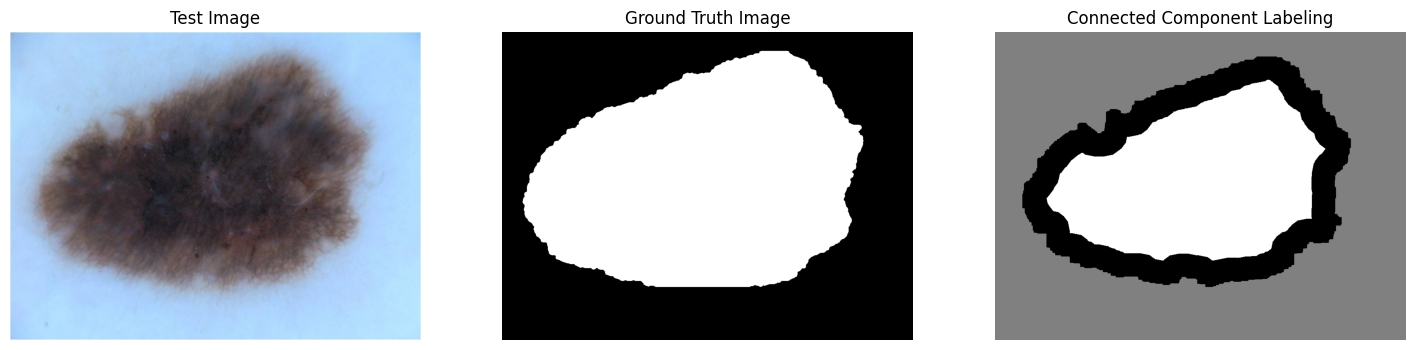

In [24]:
#Connected Component Labeling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0


# Comparing Original, Ground Truth, and Segmented Images
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display Test Image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Test Image')
ax[0].axis('off')

# Display Ground Truth Image
ax[1].imshow(gt_img, cmap='gray')
ax[1].set_title('Ground Truth Image')
ax[1].axis('off')

# Display Segmented Image
ax[2].imshow(markers, cmap='gray')
ax[2].set_title('Connected Component Labeling')
ax[2].axis('off')

plt.show()

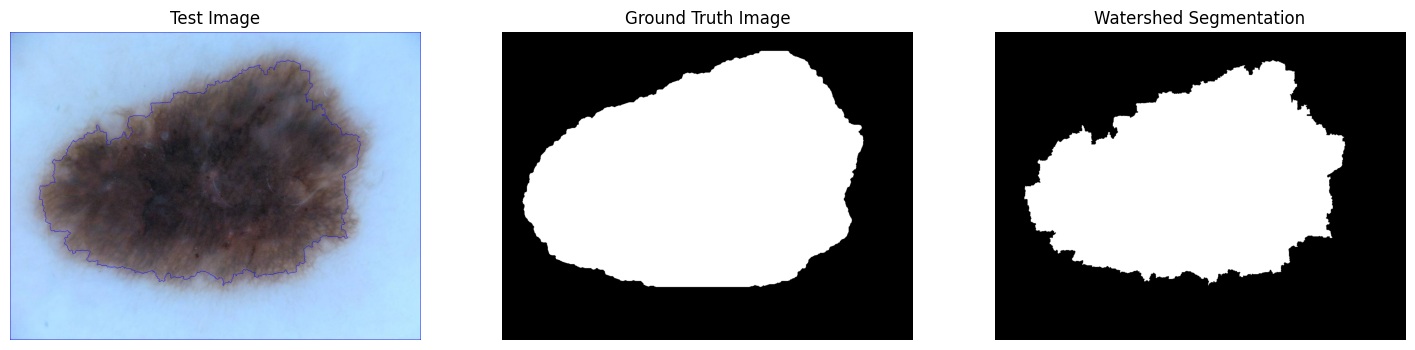

In [25]:
# Watershed Algorithm
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]
outImg = np.where(markers > 1, 1, 0).astype('uint8')

# Comparing Original, Ground Truth, and Segmented Images
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display Test Image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Test Image')
ax[0].axis('off')

# Display Ground Truth Image
ax[1].imshow(gt_img, cmap='gray')
ax[1].set_title('Ground Truth Image')
ax[1].axis('off')

# Display Segmented Image
ax[2].imshow(outImg, cmap='gray')
ax[2].set_title('Watershed Segmentation')
ax[2].axis('off')

plt.show()

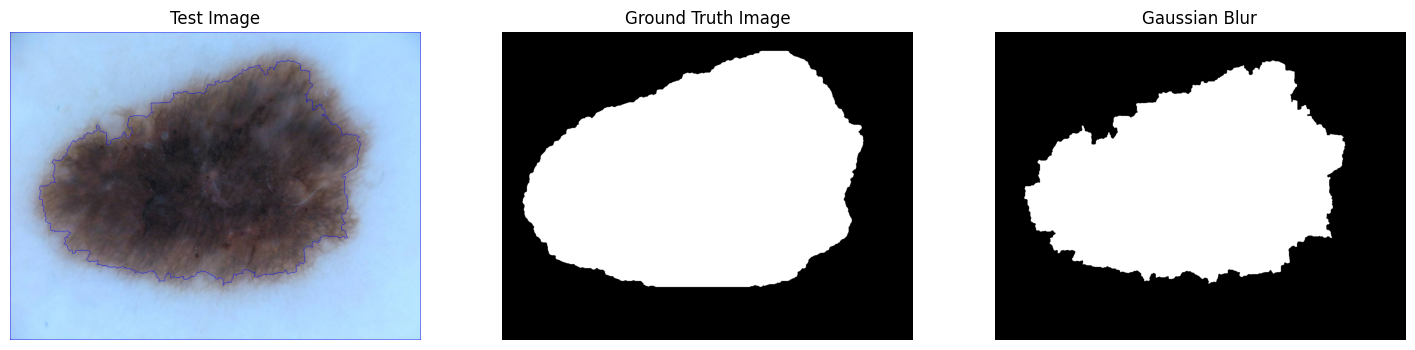

In [26]:
# Apply Gaussian Blur
outImg = cv2.GaussianBlur(outImg, (7, 7), 0)

# Comparing Original, Ground Truth, and Segmented Images
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Display Test Image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Test Image')
ax[0].axis('off')

# Display Ground Truth Image
ax[1].imshow(gt_img, cmap='gray')
ax[1].set_title('Ground Truth Image')
ax[1].axis('off')

# Display Segmented Image
ax[2].imshow(outImg, cmap='gray')
ax[2].set_title('Gaussian Blur')
ax[2].axis('off')

plt.show()

In [27]:
# SIMPLIFIED EVALUATION SEGMENT (Image Results)
from os import listdir
from os.path import isfile, join, splitext
import imageSegment as seg

def evaluate_image_performance(numImages, input_dir, output_dir, groundtruth_dir, eps=1e-8):
    onlyfiles = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
    files = onlyfiles[:numImages]

    error = np.zeros((numImages,2))
    precision = np.zeros((numImages,2))
    recall = np.zeros((numImages,2))
    iou = np.zeros((numImages,2))

    for i, name in enumerate(files):
        inputImg = cv2.imread(join(input_dir, name))
        outputImg = seg.segmentImage(inputImg).astype('float32')
        imgName = splitext(name)[0].split('_')
        gt = cv2.imread(join(groundtruth_dir, imgName[0]+'_GT_'+imgName[1]+'.png'), 0)
        gt = np.round(gt.astype('float32') / 255)

        for p in range(2):
            outputPart = (outputImg == p) * 1
            gtPart = (gt == p) * 1
            precision[i, p] = sum(sum(gtPart * outputPart)) / (sum(sum(outputPart)) + eps)
            recall[i, p] = sum(sum(gtPart * outputPart)) / sum(sum(gtPart))
            error[i, p] = 1 - ((2 * precision[i, p] * recall[i, p]) / (precision[i, p] + recall[i, p] + eps))
            iou[i, p] = sum(sum(gtPart * outputPart)) / sum(sum(np.clip(gtPart + outputPart, 0, 1)))

    avg_error = np.mean(error, axis=0)
    avg_precision = np.mean(precision, axis=0)
    avg_recall = np.mean(recall, axis=0)
    avg_iou = np.mean(iou, axis=0)

    return avg_error, avg_precision, avg_recall, avg_iou

In [28]:
# SIMPLIFIED EVALUATION SEGMENT (Parts Results)
def evaluate_parts_performance(numImages, input_dir, output_dir, groundtruth_dir, eps=1e-8):
    onlyfiles = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
    files = onlyfiles[:numImages]

    error = np.zeros((numImages, 2))
    precision = np.zeros((numImages, 2))
    recall = np.zeros((numImages, 2))
    iou = np.zeros((numImages, 2))

    for i, name in enumerate(files):
        inputImg = cv2.imread(join(input_dir, name))
        outputImg = seg.segmentImage(inputImg).astype('float32')
        imgName = splitext(name)[0].split('_')
        gt = cv2.imread(join(groundtruth_dir, imgName[0]+'_GT_'+imgName[1]+'.png'), 0)
        gt = np.round(gt.astype('float32') / 255)

        for p in range(2):
            outputPart = (outputImg == p) * 1
            gtPart = (gt == p) * 1
            precision[i, p] = sum(sum(gtPart * outputPart)) / (sum(sum(outputPart)) + eps)
            recall[i, p] = sum(sum(gtPart * outputPart)) / sum(sum(gtPart))
            error[i, p] = 1 - ((2 * precision[i, p] * recall[i, p]) / (precision[i, p] + recall[i, p] + eps))
            iou[i, p] = sum(sum(gtPart * outputPart)) / sum(sum(np.clip(gtPart + outputPart, 0, 1)))

    background_metrics = (np.mean(error[:,0]), np.mean(precision[:,0]), np.mean(recall[:,0]), np.mean(iou[:,0]))
    lesion_metrics = (np.mean(error[:,1]), np.mean(precision[:,1]), np.mean(recall[:,1]), np.mean(iou[:,1]))

    return background_metrics, lesion_metrics

In [29]:
# Function to add labels for Image Results
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

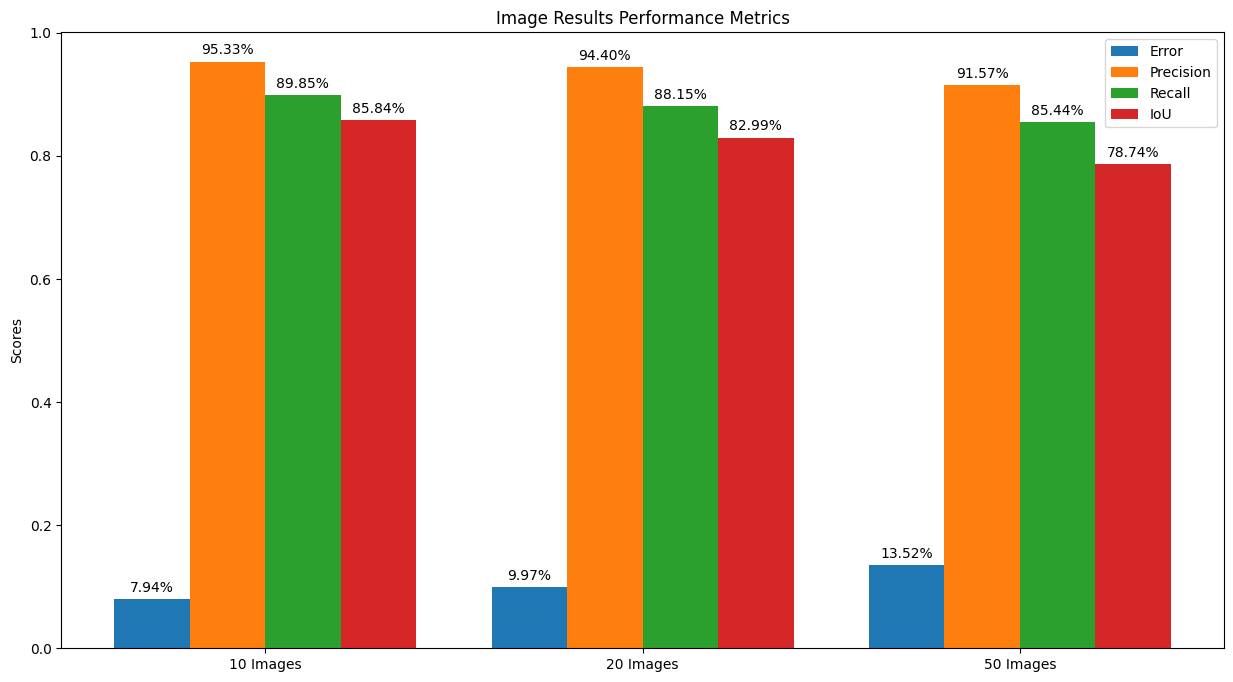

In [30]:
# Calculate metrics for different numbers of images
metrics_10 = evaluate_image_performance(10, input_dir, output_dir, groundtruth_dir)
metrics_20 = evaluate_image_performance(20, input_dir, output_dir, groundtruth_dir)
metrics_50 = evaluate_image_performance(50, input_dir, output_dir, groundtruth_dir)

# Image Results Performance Metrics Comparison
labels = ['10 Images', '20 Images', '50 Images']
error_values = [metrics_10[0].mean(), metrics_20[0].mean(), metrics_50[0].mean()]
precision_values = [metrics_10[1].mean(), metrics_20[1].mean(), metrics_50[1].mean()]
recall_values = [metrics_10[2].mean(), metrics_20[2].mean(), metrics_50[2].mean()]
iou_values = [metrics_10[3].mean(), metrics_20[3].mean(), metrics_50[3].mean()]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, error_values, width, label='Error')
rects2 = ax.bar(x, precision_values, width, label='Precision')
rects3 = ax.bar(x + width, recall_values, width, label='Recall')
rects4 = ax.bar(x + 2*width, iou_values, width, label='IoU')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

ax.set_ylabel('Scores')
ax.set_title('Image Results Performance Metrics')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

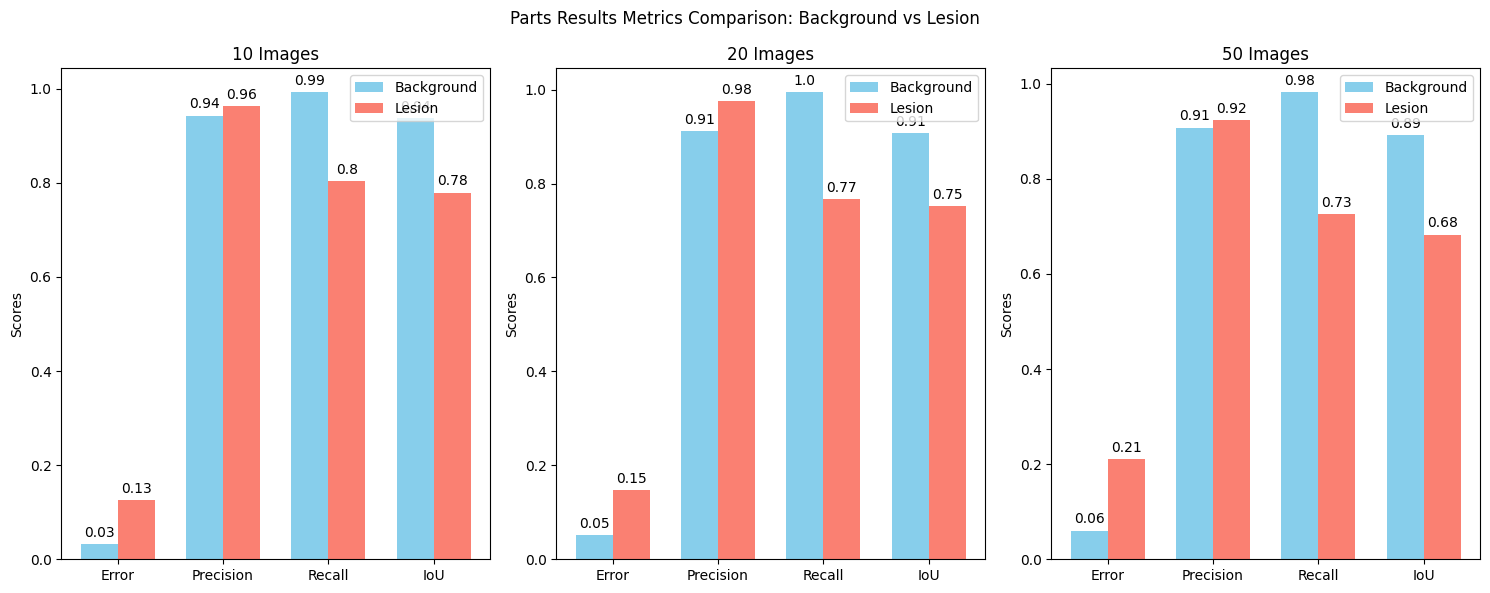

In [31]:
background_metrics_10, lesion_metrics_10 = evaluate_parts_performance(10, input_dir, output_dir, groundtruth_dir)
background_metrics_20, lesion_metrics_20 = evaluate_parts_performance(20, input_dir, output_dir, groundtruth_dir)
background_metrics_50, lesion_metrics_50 = evaluate_parts_performance(50, input_dir, output_dir, groundtruth_dir)

def plot_comparison(metrics_bg, metrics_lesion, num_images_list):
    labels = ['Error', 'Precision', 'Recall', 'IoU']
    width = 0.35  

    fig, axes = plt.subplots(1, 3, figsize=(15, 6))  

    for idx, ax in enumerate(axes):
        num_images = num_images_list[idx]
        bg_metrics = metrics_bg[idx]
        lesion_metrics = metrics_lesion[idx]

        x = np.arange(len(labels))  
        rects1 = ax.bar(x - width/2, bg_metrics, width, label='Background', color='skyblue')
        rects2 = ax.bar(x + width/2, lesion_metrics, width, label='Lesion', color='salmon')

        ax.set_ylabel('Scores')
        ax.set_title(f'{num_images} Images')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.annotate('{}'.format(round(height, 2)),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3), 
                            textcoords="offset points",
                            ha='center', va='bottom')
        autolabel(rects1)
        autolabel(rects2)

    fig.suptitle('Parts Results Metrics Comparison: Background vs Lesion')
    fig.tight_layout()
    plt.show()


metrics_bg = [background_metrics_10, background_metrics_20, background_metrics_50]
metrics_lesion = [lesion_metrics_10, lesion_metrics_20, lesion_metrics_50]
num_images_list = [10, 20, 50]

# Plot Graphs
plot_comparison(metrics_bg, metrics_lesion, num_images_list)